In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

# Review Questions

### Numpy

In [3]:
#Create a list of one integer
l = [1]

In [4]:
#Add three new integers to this list
l.extend([2,3,4])

In [5]:
#Create a numpy array of the list of integers
n = np.array(l)

In [6]:
#Multiply each of the elements by three and create a new list of the results
n2 = n*3

In [7]:
#Add to the end of this new list a single random normal element
n2 = np.append(n2,np.random.randn(1)[0])

In [8]:
#Print out the length, sum, and mean of the new list
print('n2 Length:',len(n2))
print('n2 Sum:',sum(n2))
print('n2 Mean:',n2.mean())

n2 Length: 5
n2 Sum: 30.15018822095841
n2 Mean: 6.030037644191681


### Pandas

In [9]:
#Create a dataframe of shape (10,2) with random normal variables as the body and ('A','B') as columns
df = pd.DataFrame({'A':np.random.randn(10),'B':np.random.randn(10)})
print('\nNormal DataFrame',df.shape,':\n',df)


Normal DataFrame (10, 2) :
           A         B
0  1.089539  1.530940
1 -1.187606 -0.849596
2 -0.819685 -0.051758
3  0.638901 -1.106606
4 -0.764736 -0.391878
5 -0.157523  0.069407
6  0.195588 -1.317963
7  0.066238 -0.648067
8  0.832517 -1.451295
9 -0.239601  0.127849


In [10]:
#Using the loc() function, find the first three elements of 'B'. Print the result.
df.loc[:2,'B']

0    1.530940
1   -0.849596
2   -0.051758
Name: B, dtype: float64

In [11]:
#Using the iloc() function, find the last two elements of 'A'. Print the result.
df.iloc[8:,0]

8    0.832517
9   -0.239601
Name: A, dtype: float64

In [14]:
#Create a new column of 'A' in reverse order, name it 'C'. Print the table.
df['C'] = df.loc[::-1,'A'].values
print(df)

          A         B         C
0  1.089539  1.530940 -0.239601
1 -1.187606 -0.849596  0.832517
2 -0.819685 -0.051758  0.066238
3  0.638901 -1.106606  0.195588
4 -0.764736 -0.391878 -0.157523
5 -0.157523  0.069407 -0.764736
6  0.195588 -1.317963  0.638901
7  0.066238 -0.648067 -0.819685
8  0.832517 -1.451295 -1.187606
9 -0.239601  0.127849  1.089539


In [13]:
#Print the values of 'B' that are greater than zero but less than 1
print(df[(df['B']>0) & (df['B']<1)].loc[:,'B'])

5    0.069407
9    0.127849
Name: B, dtype: float64


### Seaborn
#### FacetGrid versus AxesSubplot
I felt that this was unclear leaving our last session, so we will review this quickly in slightly more detail than was gone into at the previous session. Recall that there are two different types of objects returned by methods in Seaborn, an AxesSubplot and a FacetGrid

In [15]:
print('sns.relplot() Type:',type(sns.relplot(x='X',y='Y',data=pd.DataFrame({'X':[0],'Y':[0]}))))
print('sns.scatterplot() Type:',type(sns.scatterplot(x='X',y='Y',data=pd.DataFrame({'X':[0],'Y':[0]}))))
plt.close()

sns.relplot() Type: <class 'seaborn.axisgrid.FacetGrid'>
sns.scatterplot() Type: <class 'matplotlib.axes._subplots.AxesSubplot'>


The difference between the two is slight but important. The AxesSubplot allows you to layer a plot on top of an existing FacetGrid. Likewise, the FacetGrid acts as a base over which different Axes can be plotted.

For example:

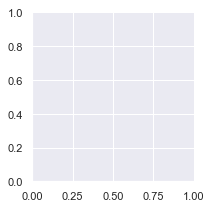

In [16]:
X = np.random.randn(10)
Y = np.random.randn(10)
sns.FacetGrid(data=pd.DataFrame({'X':X,'Y':Y}))

This is a FacetGrid, a blank slate with some data that has not been visualized. On top of this, we can plot a scatterplot().

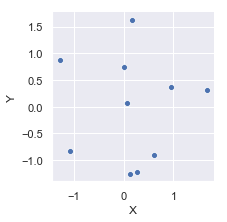

In [17]:
sns.FacetGrid(data=pd.DataFrame({'X':X,'Y':Y}))
sns.scatterplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}))

But, we cannot overlay a relplot() as it creates a new FacetGrid.

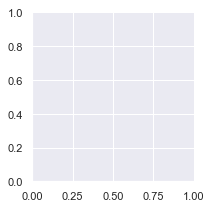

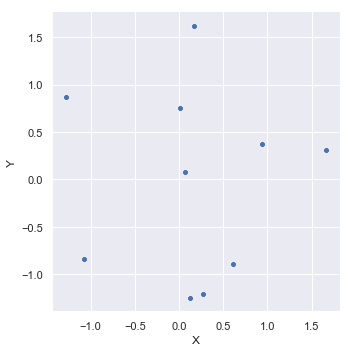

In [18]:
sns.FacetGrid(data=pd.DataFrame({'X':X,'Y':Y}))
sns.relplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}))

However, since relplot() creates a new FacetGrid, we can plot on top of it.

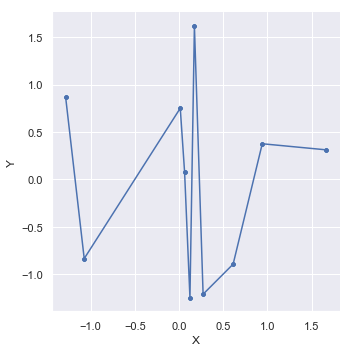

In [19]:
sns.relplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}))
sns.lineplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}))

Finally, let's establish which methods return FacetGrids and return to our lesson.

In [20]:
print('sns.relplot() Type:',type(sns.relplot(x='X',y='Y',data=pd.DataFrame({'X':[0],'Y':[0]})))); plt.close()
print('sns.catplot() Type:',type(sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':[0],'Y':[0]})))); plt.close()
print('sns.lmplot() Type:',type(sns.lmplot(x='X',y='Y',data=pd.DataFrame({'X':[0],'Y':[0]})))); plt.close()

sns.relplot() Type: <class 'seaborn.axisgrid.FacetGrid'>
sns.catplot() Type: <class 'seaborn.axisgrid.FacetGrid'>
sns.lmplot() Type: <class 'seaborn.axisgrid.FacetGrid'>


/Users/jacobswe/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


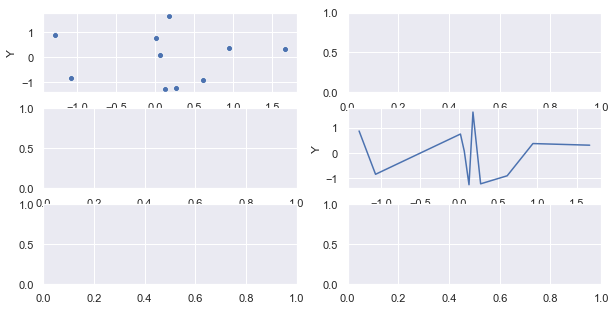

In [26]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(10,5))
sns.scatterplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),ax=axs[0,0])
sns.lineplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),ax=axs[1,1])